In [2]:
# Exploring the Hindi-Chinese Parallel Corpus (CCMatrix)
# Dataset: hi-zh.txt with ~2.27M sentence pairs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Bad value in file PosixPath('/Users/shanaywadhwani/.matplotlib/stylelib/my_style1.mplstyle'), line 1 ('figure.facecolor : #EEECF2'): Key figure.facecolor: '' does not look like a color arg
Bad value in file PosixPath('/Users/shanaywadhwani/.matplotlib/stylelib/my_style1.mplstyle'), line 19 ('axes.facecolor : #F0F2EC'): Key axes.facecolor: '' does not look like a color arg
Bad value in file PosixPath('/Users/shanaywadhwani/.matplotlib/stylelib/my_style1.mplstyle'), line 20 ('axes.edgecolor : #b0a6c2'): Key axes.edgecolor: '' does not look like a color arg
Bad value in file PosixPath('/Users/shanaywadhwani/.matplotlib/stylelib/my_style1.mplstyle'), line 31 ('legend.facecolor : #EEECF2'): Key legend.facecolor: '' does not look like a color arg


Libraries imported successfully!


In [3]:
# Load the dataset
# Note: This is a large dataset (~2.27M lines), so we'll start with a sample

data_path = '../data/hi-zh.txt/'

# Read a sample of the data (first 100K lines for initial exploration)
print("Loading sample data...")
sample_size = 100000

hindi_sentences = []
chinese_sentences = []
scores = []

with open(data_path + 'CCMatrix.hi-zh.hi', 'r', encoding='utf-8') as f:
    hindi_sentences = [line.strip() for line in f.readlines()[:sample_size]]

with open(data_path + 'CCMatrix.hi-zh.zh', 'r', encoding='utf-8') as f:
    chinese_sentences = [line.strip() for line in f.readlines()[:sample_size]]

with open(data_path + 'CCMatrix.hi-zh.scores', 'r', encoding='utf-8') as f:
    scores = [float(line.strip()) for line in f.readlines()[:sample_size]]

# Create DataFrame
df = pd.DataFrame({
    'hindi': hindi_sentences,
    'chinese': chinese_sentences,
    'score': scores
})

print(f"Loaded {len(df):,} sentence pairs")
print(f"\nFirst few examples:")
df.head(10)


Loading sample data...
Loaded 100,000 sentence pairs

First few examples:


,hindi,chinese,score
0,"कुछ नहीं, बल्कि जो कुछ वे कमाते रहे है वह उनके...",”14.绝不然，但他们所犯的罪恶，已像锈样蒙敝他们的心。,1.249284
1,"कुछ नहीं, बल्कि जो कुछ वे कमाते रहे है वह उनके...",” 14.绝不然，但他们所犯的罪恶，已像锈样蒙敝他们的心。,1.249284
2,''और हमने इसराईलियों को समुद्र पार करा दिया।,我曾使以色列後裔渡過海去。,1.248648
3,ताकि हम पीछे चलें जादूगरों के यदि वही प्रभुत्व...,」 我們盼望追從眾術士，如果他們獲勝的時候。,1.247811
4,ताकि हम पीछे चलें जादूगरों के यदि वही प्रभुत्व...,” 假如魔術師們獲勝了，我們也許會追隨他們。,1.246428
5,"La Alhambra तो (अरबी में, ( «qa'lat अल हमरा '»...",君子之道，焉可诬也？有始有卒者，其惟圣人乎！”，13.14 冉子退朝。,1.245988
6,"La Alhambra तो (अरबी में, ( «qa'lat अल हमरा '»...",大鑽擴孔，鑽頭選擇要適宜，防止(zhi)LED小燈(deng)插上後不穩，或者插上焊(han...,1.245889
7,और उनको हमने बनी इसराईल के लिए (अपनी कुदरत का)...,就這樣，我使以色列人繼承了它[注]。,1.245800
8,"हमने उसे मार्ग दिखाया, अब चाहे वह शुक्रगुज़ार ...",{【我确已指引他正道，他或是感谢，或是辜负。,1.244309
9,कि वे हर कुशल जादूगर को तुम्हारे पास ले आएँ।,他们会把所有高明的术士都召到你这里来。,1.244085


In [4]:
# Basic Statistics
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

print(f"\nTotal sentence pairs in sample: {len(df):,}")
print(f"Total pairs in full dataset: ~2,270,163")

print(f"\nScore Statistics:")
print(df['score'].describe())

print(f"\nMissing values:")
print(df.isnull().sum())

print(f"\nEmpty sentences:")
print(f"Hindi empty: {(df['hindi'] == '').sum()}")
print(f"Chinese empty: {(df['chinese'] == '').sum()}")


DATASET OVERVIEW

Total sentence pairs in sample: 100,000
Total pairs in full dataset: ~2,270,163

Score Statistics:
count    100000.000000
mean          1.124483
std           0.016747
min           1.107565
25%           1.112502
50%           1.119345
75%           1.131092
max           1.249284
Name: score, dtype: float64

Missing values:
hindi      0
chinese    0
score      0
dtype: int64

Empty sentences:
Hindi empty: 0
Chinese empty: 0


In [9]:
# Analyze sentence lengths
df['hindi_length'] = df['hindi'].str.len()
df['chinese_length'] = df['chinese'].str.len()
df['hindi_word_count'] = df['hindi'].str.split().str.len()
df['chinese_char_count'] = df['chinese'].apply(lambda x: len([c for c in x if '\u4e00' <= c <= '\u9fff']))

print("Sentence Length Statistics:")
print("\nHindi (characters):")
print(df['hindi_length'].describe())

print("\nChinese (characters):")
print(df['chinese_length'].describe())

print("\nHindi (words):")
print(df['hindi_word_count'].describe())

print("\nChinese (characters - Chinese only):")
print(df['chinese_char_count'].describe())


Sentence Length Statistics:

Hindi (characters):
count    100000.000000
mean         73.484810
std          39.032883
min           4.000000
25%          45.000000
50%          66.000000
75%          94.000000
max         494.000000
Name: hindi_length, dtype: float64

Chinese (characters):
count    100000.000000
mean         25.119190
std          15.010727
min           2.000000
25%          16.000000
50%          22.000000
75%          31.000000
max         489.000000
Name: chinese_length, dtype: float64

Hindi (words):
count    100000.000000
mean         15.486400
std           8.218685
min           1.000000
25%          10.000000
50%          14.000000
75%          20.000000
max         113.000000
Name: hindi_word_count, dtype: float64

Chinese (characters - Chinese only):
count    100000.000000
mean         19.507330
std          10.564588
min           0.000000
25%          12.000000
50%          18.000000
75%          25.000000
max         450.000000
Name: chinese_char_count, d

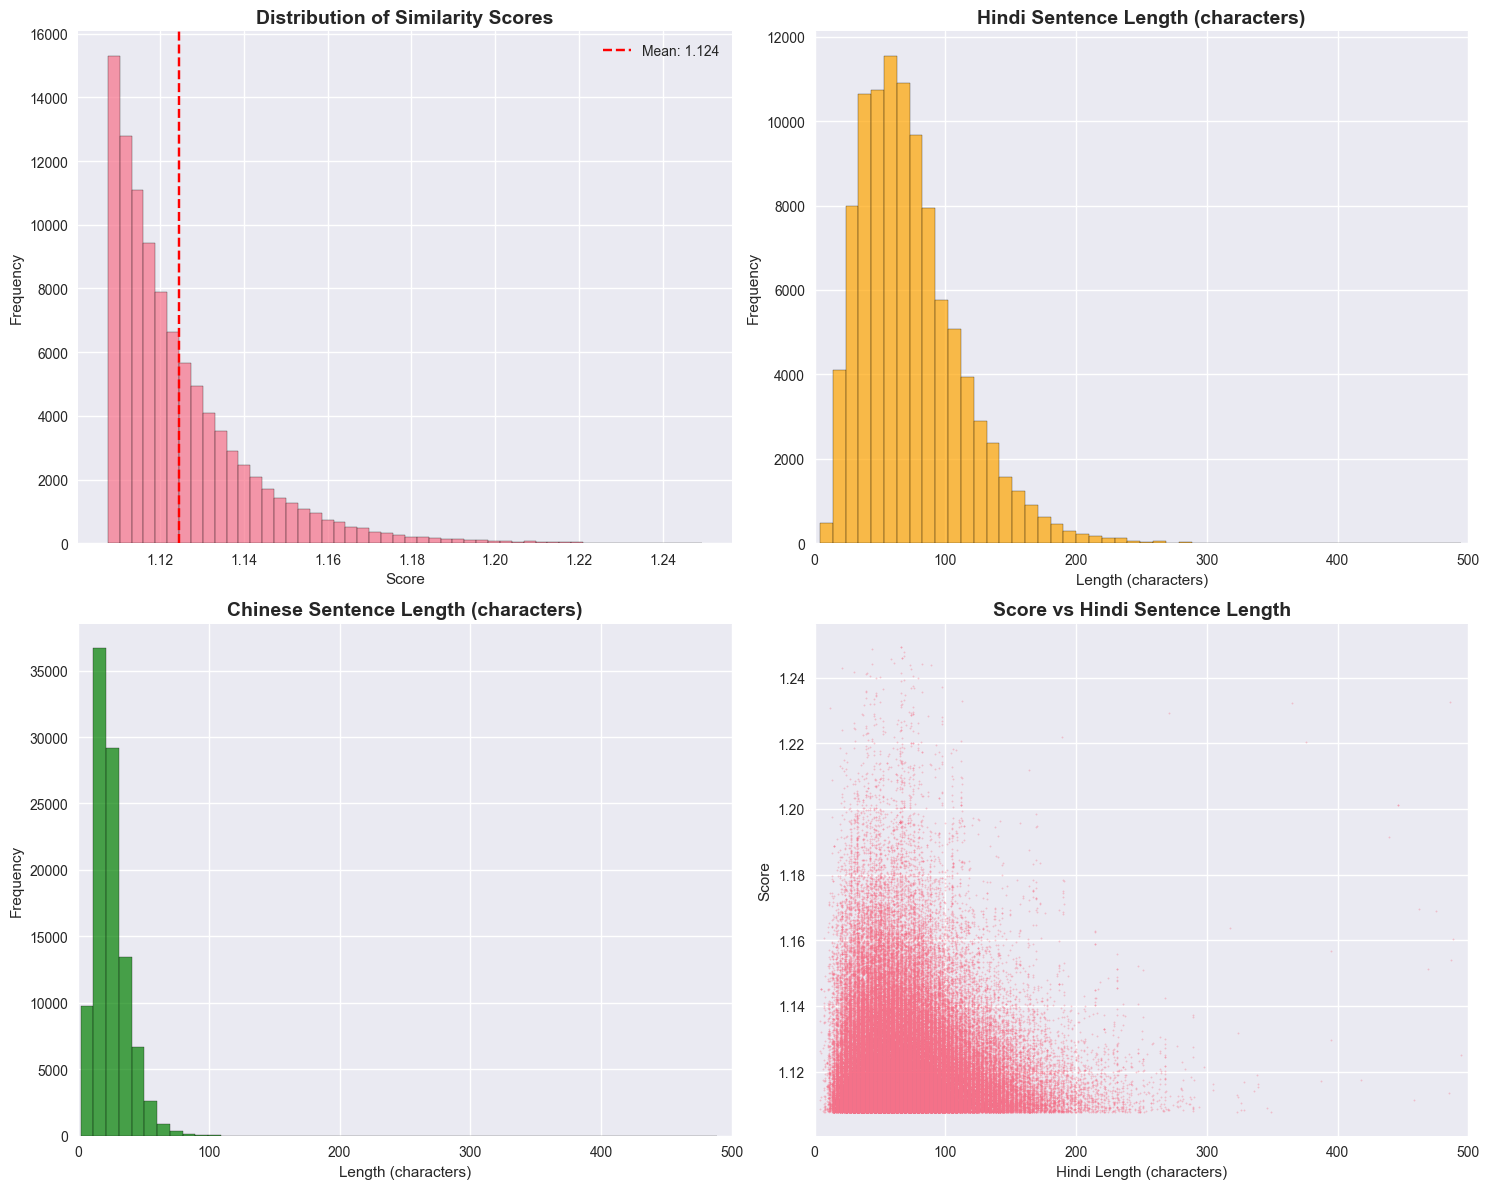


Correlation between score and Hindi length: -0.124
Correlation between score and Chinese length: -0.062


In [10]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Score distribution
axes[0, 0].hist(df['score'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Similarity Scores', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['score'].mean(), color='red', linestyle='--', label=f'Mean: {df["score"].mean():.3f}')
axes[0, 0].legend()

# Hindi sentence length distribution
axes[0, 1].hist(df['hindi_length'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Hindi Sentence Length (characters)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Length (characters)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlim(0, 500)  # Limit x-axis for better visualization

# Chinese sentence length distribution
axes[1, 0].hist(df['chinese_length'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Chinese Sentence Length (characters)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Length (characters)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xlim(0, 500)

# Score vs Length correlation
axes[1, 1].scatter(df['hindi_length'], df['score'], alpha=0.3, s=1)
axes[1, 1].set_title('Score vs Hindi Sentence Length', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Hindi Length (characters)')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xlim(0, 500)

plt.tight_layout()
plt.show()

print(f"\nCorrelation between score and Hindi length: {df['score'].corr(df['hindi_length']):.3f}")
print(f"Correlation between score and Chinese length: {df['score'].corr(df['chinese_length']):.3f}")


In [5]:
# Examine high and low quality pairs
print("=" * 60)
print("HIGH QUALITY PAIRS (Top 10 by score)")
print("=" * 60)
top_pairs = df.nlargest(10, 'score')[['hindi', 'chinese', 'score']]
for idx, row in top_pairs.iterrows():
    print(f"\nScore: {row['score']:.4f}")
    print(f"Hindi: {row['hindi'][:200]}...")
    print(f"Chinese: {row['chinese'][:200]}...")
    print("-" * 60)

print("\n" + "=" * 60)
print("LOW QUALITY PAIRS (Bottom 10 by score)")
print("=" * 60)
bottom_pairs = df.nsmallest(10, 'score')[['hindi', 'chinese', 'score']]
for idx, row in bottom_pairs.iterrows():
    print(f"\nScore: {row['score']:.4f}")
    print(f"Hindi: {row['hindi'][:200]}...")
    print(f"Chinese: {row['chinese'][:200]}...")
    print("-" * 60)


HIGH QUALITY PAIRS (Top 10 by score)

Score: 1.2493
Hindi: कुछ नहीं, बल्कि जो कुछ वे कमाते रहे है वह उनके दिलों पर चढ़ गया है...
Chinese: ”14.绝不然，但他们所犯的罪恶，已像锈样蒙敝他们的心。...
------------------------------------------------------------

Score: 1.2493
Hindi: कुछ नहीं, बल्कि जो कुछ वे कमाते रहे है वह उनके दिलों पर चढ़ गया है...
Chinese: ” 14.绝不然，但他们所犯的罪恶，已像锈样蒙敝他们的心。...
------------------------------------------------------------

Score: 1.2486
Hindi: ''और हमने इसराईलियों को समुद्र पार करा दिया।...
Chinese: 我曾使以色列後裔渡過海去。...
------------------------------------------------------------

Score: 1.2478
Hindi: ताकि हम पीछे चलें जादूगरों के यदि वही प्रभुत्वशाली (विजयी) हो जायें।...
Chinese: 」 我們盼望追從眾術士，如果他們獲勝的時候。...
------------------------------------------------------------

Score: 1.2464
Hindi: ताकि हम पीछे चलें जादूगरों के यदि वही प्रभुत्वशाली (विजयी) हो जायें।...
Chinese: ” 假如魔術師們獲勝了，我們也許會追隨他們。...
------------------------------------------------------------

Score: 1.2460
Hindi: La Alhambra तो 

In [ ]:
# Analyze score distribution by quantiles
print("Score Distribution by Quantiles:")
print(df['score'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

# Filter high-quality pairs (top 5% by score)
high_quality_threshold = df['score'].quantile(0.95)
high_quality_df = df[df['score'] >= high_quality_threshold]

print(f"\nHigh-quality pairs (top 5%): {len(high_quality_df):,}")
print(f"Threshold score: {high_quality_threshold:.4f}")

# Sample some random pairs
print("\n" + "=" * 60)
print("RANDOM SAMPLE OF PAIRS")
print("=" * 60)
random_sample = df.sample(5, random_state=42)
for idx, row in random_sample.iterrows():
    print(f"\nScore: {row['score']:.4f}")
    print(f"Hindi: {row['hindi']}")
    print(f"Chinese: {row['chinese']}")
    print("-" * 60)


================================================================================
Topic: Translation Quality Estimation
================================================================================

Description: Predict translation quality without reference translations

Key Components:
  1. Build quality estimation models (neural, feature-based)
  2. Use sentence embeddings and linguistic features
  3. Predict quality scores for translation outputs
  4. Compare with human judgments
  5. Apply to filter low-quality translations

Main Challenges: Feature engineering, model interpretability, evaluation metrics


In [11]:
# Additional Analysis: Check for patterns in the data

# Ensure length columns exist (create them if they don't)
if 'hindi_length' not in df.columns:
    df['hindi_length'] = df['hindi'].str.len()
if 'chinese_length' not in df.columns:
    df['chinese_length'] = df['chinese'].str.len()

# Check for duplicate sentences
print("Duplicate Analysis:")
print(f"Duplicate Hindi sentences: {df['hindi'].duplicated().sum()}")
print(f"Duplicate Chinese sentences: {df['chinese'].duplicated().sum()}")
print(f"Duplicate pairs: {df.duplicated(subset=['hindi', 'chinese']).sum()}")

# Analyze score ranges
print("\nScore Range Analysis:")
print(f"Min score: {df['score'].min():.4f}")
print(f"Max score: {df['score'].max():.4f}")
print(f"Score range: {df['score'].max() - df['score'].min():.4f}")

# Check length ratios
df['length_ratio'] = df['hindi_length'] / (df['chinese_length'] + 1)  # +1 to avoid division by zero
print(f"\nLength Ratio (Hindi/Chinese):")
print(df['length_ratio'].describe())

# Identify potential issues
print("\nPotential Data Quality Issues:")
print(f"Pairs with very different lengths (ratio > 3 or < 0.33): {(df['length_ratio'] > 3).sum() + (df['length_ratio'] < 0.33).sum()}")
print(f"Very short sentences (< 10 chars): {(df['hindi_length'] < 10).sum() + (df['chinese_length'] < 10).sum()}")
print(f"Very long sentences (> 500 chars): {(df['hindi_length'] > 500).sum() + (df['chinese_length'] > 500).sum()}")


Duplicate Analysis:
Duplicate Hindi sentences: 25523
Duplicate Chinese sentences: 2243
Duplicate pairs: 1074

Score Range Analysis:
Min score: 1.1076
Max score: 1.2493
Score range: 0.1417

Length Ratio (Hindi/Chinese):
count    100000.000000
mean          2.848126
std           0.746708
min           0.010811
25%           2.375000
50%           2.850000
75%           3.307692
max          10.571429
Name: length_ratio, dtype: float64

Potential Data Quality Issues:
Pairs with very different lengths (ratio > 3 or < 0.33): 39866
Very short sentences (< 10 chars): 4957
Very long sentences (> 500 chars): 0
